In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [57]:
Af = 0.8
Bf = 0.2
As = 0.99
Bs = 0.05

p = np.concatenate([ np.zeros(100), np.ones(400), np.zeros(20000) ])

def FastSlowModel(x, t):
    global p
    
    x1 = x[0]
    x2 = x[1]
    xx = x[2]
    e = x[3]
    fx1 = -x1 + Af*x1 + Bf*e
    fx2 = -x2 + As*x2 + Bs*e
    fx = -xx + (x1 + x2)
    fe = -e + (p[int(t)]-xx)
    
    return np.array([fx1, fx2, fx, fe])

In [58]:
time = np.arange(1000)

x1, x2, x, e = 0, 0, 0, 0  # starting point

odesol = odeint(FastSlowModel, [x1, x2, x, e], time)

x1_timeseries, x2_timeseries, x_timeseries, e_timeseries = odesol.T

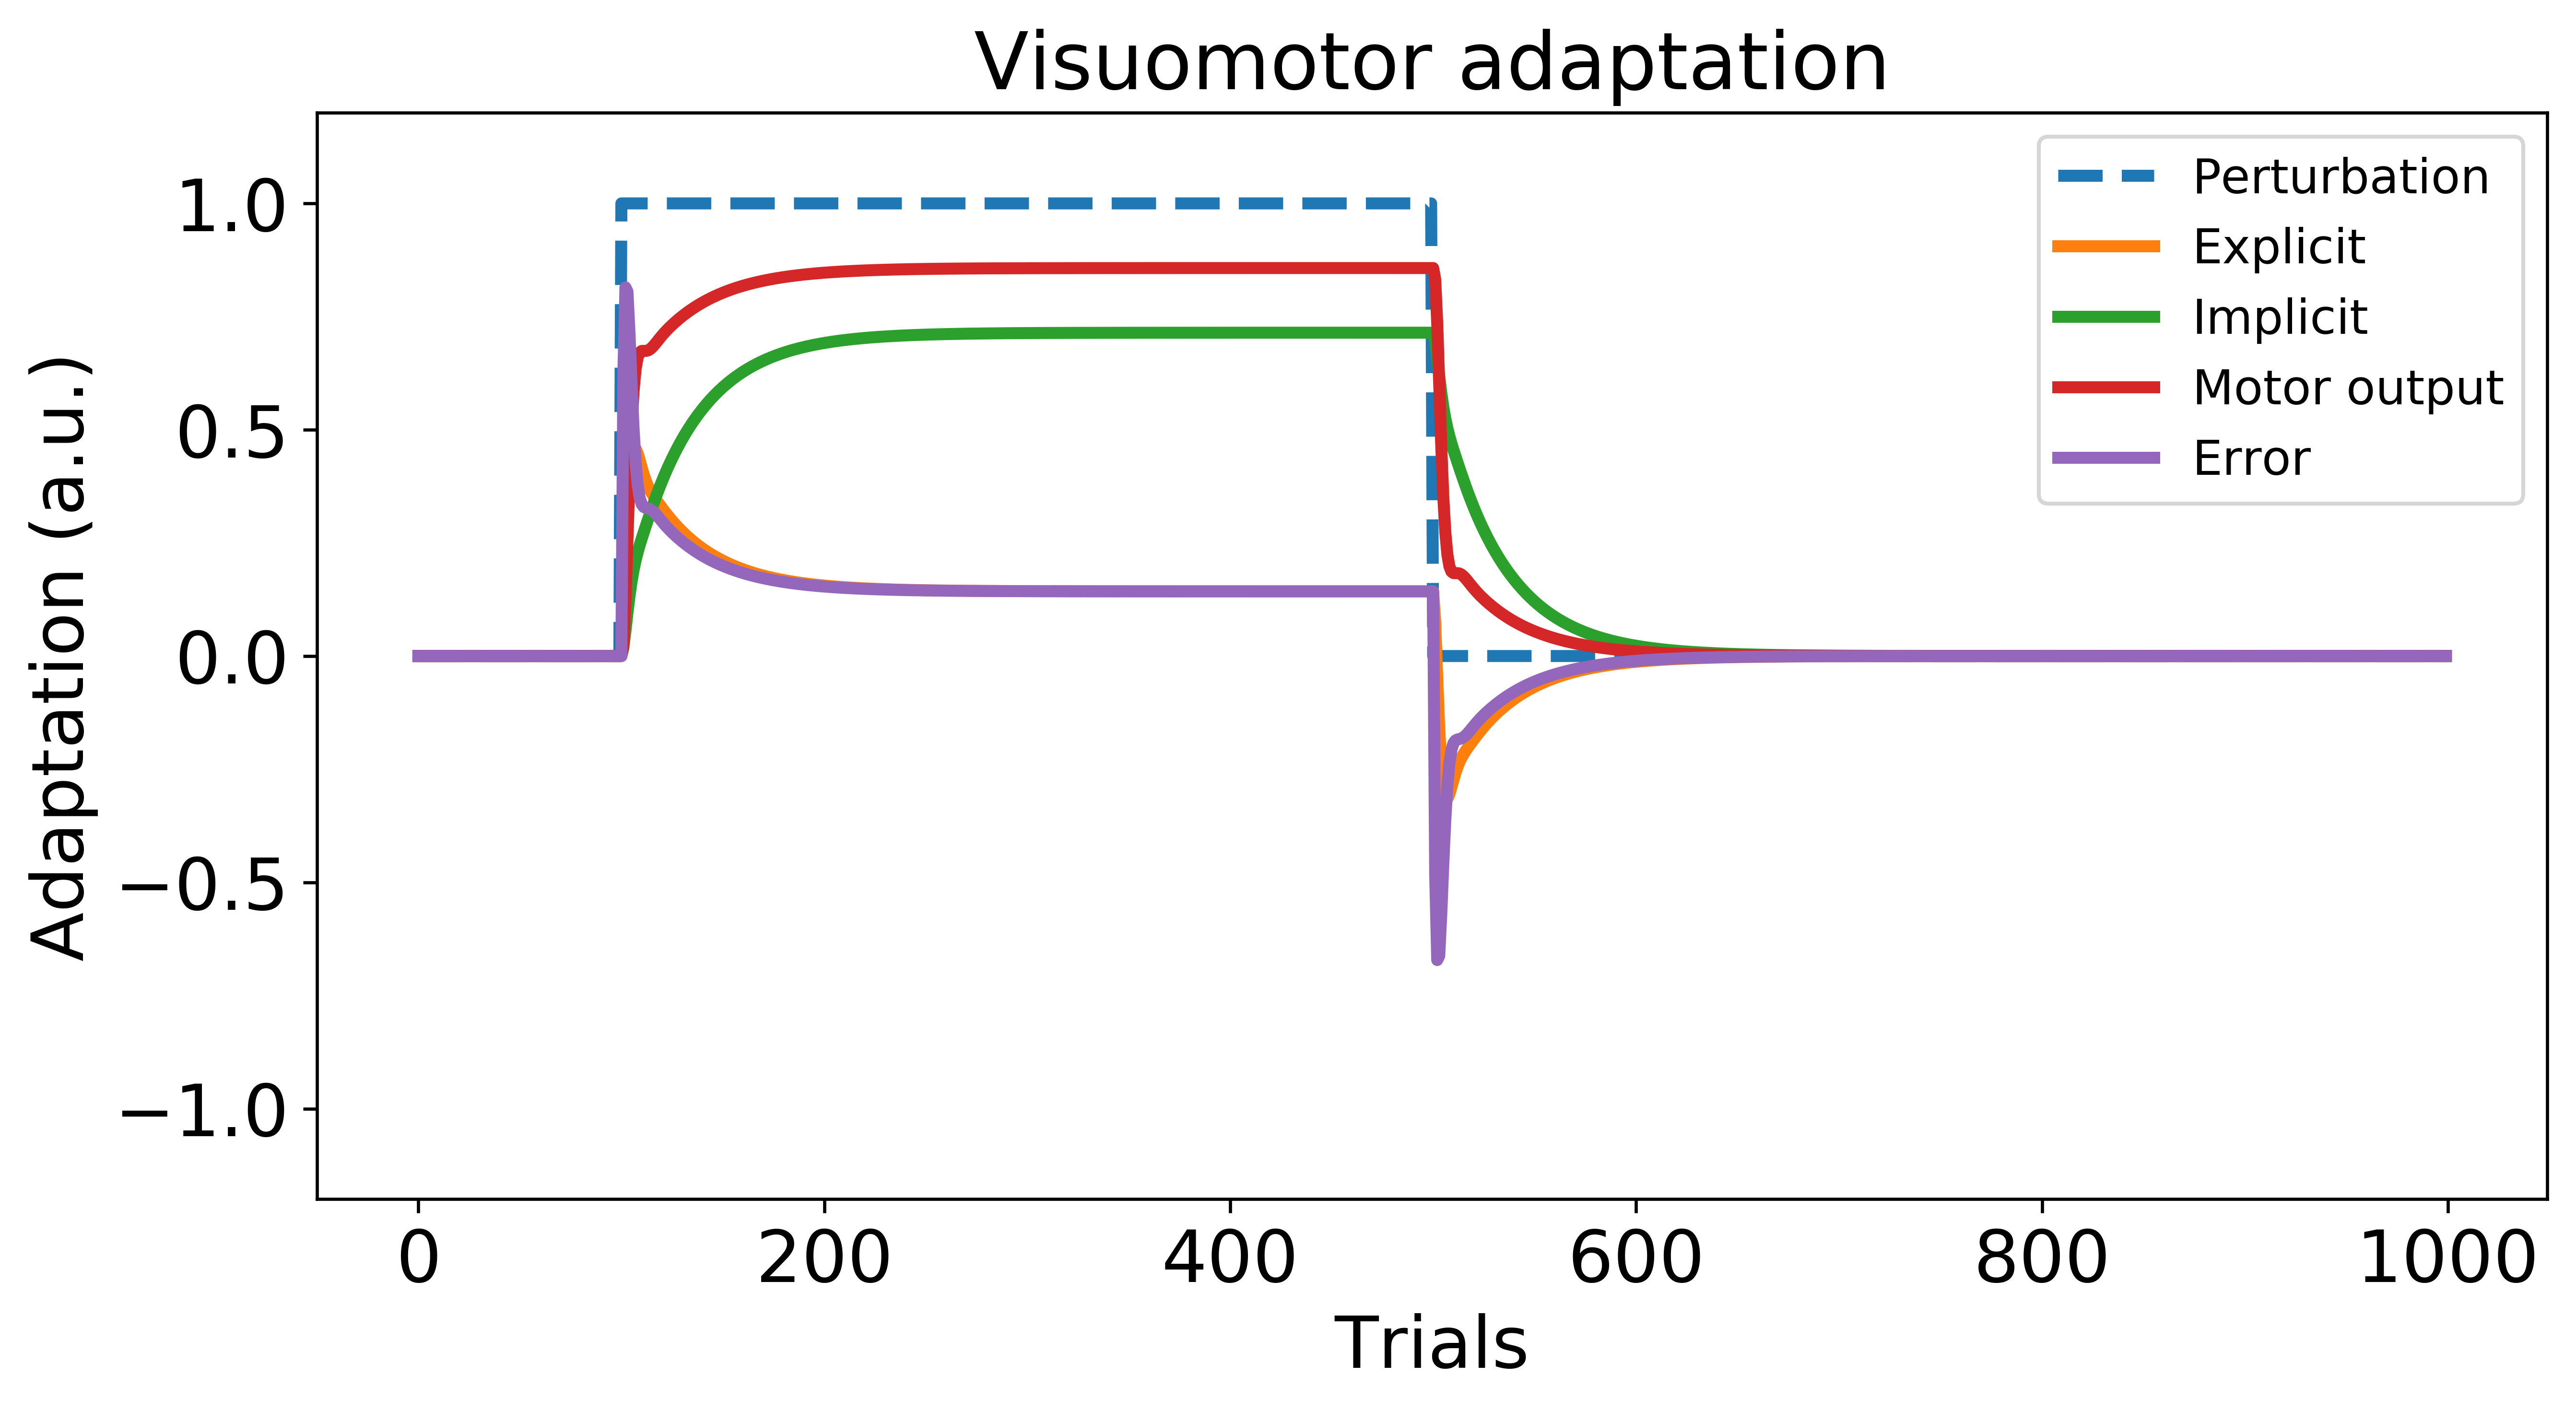

In [59]:
plt.figure(figsize=(10,5), dpi=600)

plt.plot(p[:1000], label='Perturbation', linewidth=3, linestyle='--')
plt.plot(x1_timeseries, label='Explicit', linewidth=3)
plt.plot(x2_timeseries, label='Implicit', linewidth=3)
plt.plot(x_timeseries, label='Motor output', linewidth=3)
plt.plot(e_timeseries, label='Error', linewidth=3)

plt.title('Visuomotor adaptation', fontsize=20)
plt.xlabel('Trials', fontsize=18)
plt.ylabel('Adaptation (a.u.)', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.ylim(-1.2, 1.2)

plt.legend(fontsize=12, loc='upper right')

plt.show()